<a href="https://colab.research.google.com/github/SundaresanMS/kaggle_competitions/blob/master/Kaggle_Comp_10_02_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json



total 4
-rw------- 1 root root 68 Feb 10 16:06 kaggle.json
{"username":"sundaresan96","key":"4e11354a67a83e6ddef5e2ff34cd45fa"}

In [7]:
 !pip install -q kaggle
!pip install -q kaggle-cli



    100% |████████████████████████████████| 81kB 5.3MB/s 
    100% |████████████████████████████████| 5.3MB 5.3MB/s 
    100% |████████████████████████████████| 92kB 21.8MB/s 
    100% |████████████████████████████████| 51kB 20.9MB/s 


In [8]:
 !kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           4905  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           7069  
timoboz/stock-data-dow-jones                                 EOD data for all Dow Jones stocks                     2MB  2019-02-10 03:58:19           1092  
bigquery/crypto-ethereum-classic                             Ethereum Classic Blockchain                          66GB  2019-02-05 17:41:48              0  
russellyates88/suicide-rates-overview-1985-to-2016        

In [9]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2600           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10035            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4126            True  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         33           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2300           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2897           False  
LANL-Ear

In [10]:
!kaggle competitions list -s diabetic

ref                             deadline             category    reward  teamCount  userHasEntered  
------------------------------  -------------------  --------  --------  ---------  --------------  
diabetic-retinopathy-detection  2015-07-27 23:59:00  Featured  $100,000        661           False  


In [12]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.56MB/s]


In [13]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


In [0]:
#imports


import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [20]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [0]:
dict_={}
for col in train.columns:
  length =   train[col].shape[0]
  data = train[col].drop_duplicates()
  if data.shape[0] < length*0.01:
    dict_[col] = data.tolist()
    

In [27]:
dict_

{'Embarked': ['S', 'C', 'Q', nan],
 'Parch': [0, 1, 2, 5, 3, 4, 6],
 'Pclass': [3, 1, 2],
 'Sex': ['male', 'female'],
 'SibSp': [1, 0, 3, 4, 2, 5, 8],
 'Survived': [0, 1]}

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
train.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [34]:
train.Sex.value_counts()/train.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [41]:
train[['Sex','Survived']].groupby(by = 'Sex')[['Survived']].sum()

,Survived
Sex,
female,233
male,109


In [43]:
train[['Survived','SibSp']].groupby(by = 'SibSp')[['Survived']].sum()

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


In [47]:
train[['SibSp','Sex','Survived']].groupby(['SibSp','Sex'])['Survived'].count()

SibSp  Sex   
0      female    174
       male      434
1      female    106
       male      103
2      female     13
       male       15
3      female     11
       male        5
4      female      6
       male       12
5      female      1
       male        4
8      female      3
       male        4
Name: Survived, dtype: int64

In [59]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
s1 = train.isnull().sum()
s2 = train.isnull().mean()

In [98]:
pd.DataFrame({'sum':s1,'mean':s2})

,mean,sum
PassengerId,0.000000,0
Survived,0.000000,0
Pclass,0.000000,0
Name,0.000000,0
Sex,0.000000,0
Age,0.198653,177
SibSp,0.000000,0
Parch,0.000000,0
Ticket,0.000000,0
Fare,0.000000,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


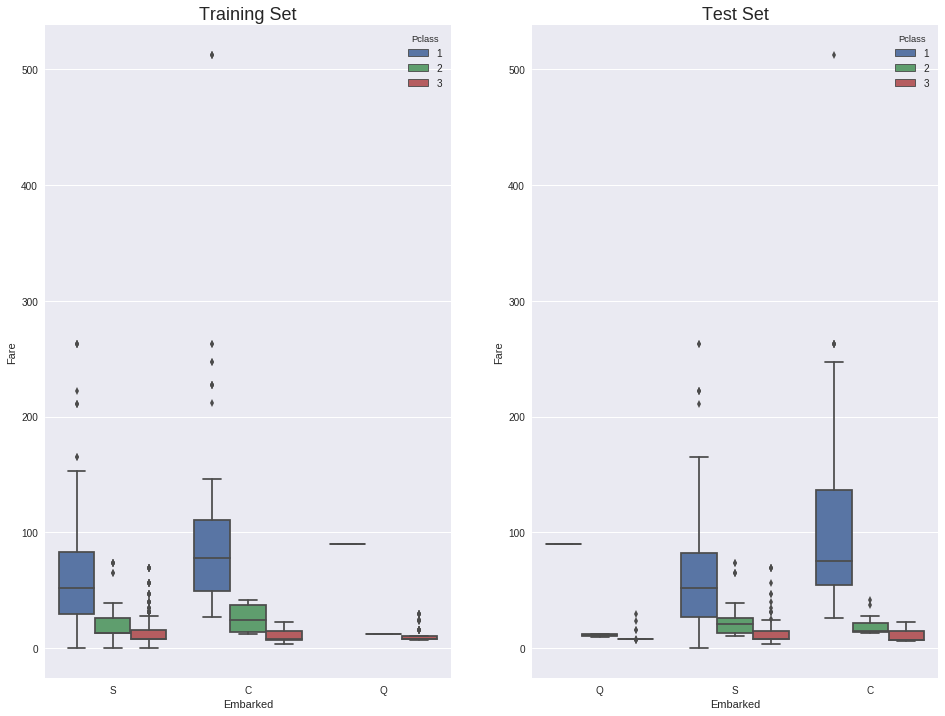

In [101]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)
fig.show()



In [0]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a